In [1]:

import torch

x=torch.ones((2,3))
for i in x.tolist():
    print(i)
    print("+++++++++")


[1.0, 1.0, 1.0]
+++++++++
[1.0, 1.0, 1.0]
+++++++++


In [6]:
import torch
x=(tuple,dict,torch.nn.Module)
if isinstance(torch.nn.Linear,x):
    print(True)

In [1]:
from typing import List, Union
def is_valid_image(image) -> bool:
    if isinstance(image, int):
        return True

def make_batched_images(images) -> List[List[int]]:
    """
    Accepts images in list or nested list format, and makes a list of images for preprocessing.

    Args:
        images (`Union[List[List[ImageInput]], List[ImageInput], ImageInput]`):
            The input image.

    Returns:
        list: A list of images.
    """
    if (
        isinstance(images, (list, tuple))
        and isinstance(images[0], (list, tuple))
        and is_valid_image(images[0][0])
    ):
        return [img for img_list in images for img in img_list]

    elif isinstance(images, (list, tuple)) and is_valid_image(images[0]):
        return images

    elif is_valid_image(images):
        return [images]

    raise ValueError(f"Could not make batched images from {images}")

images=[[1,2,3],[4,5,6],[7,8,9]]

print(make_batched_images(images))
images=[1,2,3]
print(make_batched_images(images))
print(make_batched_images(1))
import torch



# 创建一个目标张量
input_tensor = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])

# 创建一个布尔掩码
mask = torch.tensor([True, False, True, False, True], dtype=torch.bool)

# 创建一个源张量，其中的元素将根据掩码散列到目标张量
source_tensor = torch.tensor([10.0, 20.0, 30.0])

# 应用 masked_scatter 操作
output_tensor = input_tensor.masked_scatter(mask, source_tensor)

print(output_tensor)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3]
[1]
tensor([10.,  2., 20.,  4., 30.])


In [2]:
a='2324'+'\\n'
print(a)

2324\n


In [ ]:
from accelerate.state import PartialState

state = PartialState()
state.device

In [3]:

0.5==1/2
if "bb":
    print('true')

true


In [1]:
a='[fsdfas]'
print(a[1:-1])

fsdfas


In [2]:
import torch
model=torch.nn.Linear(3,6)
model=torch.compile(model)
model = model._orig_mod.state_dict()
print(model)


OrderedDict({'weight': tensor([[-0.3899,  0.0288,  0.4145],
        [-0.5439,  0.0530, -0.2633],
        [-0.4076, -0.1845, -0.3485],
        [-0.4281,  0.4199, -0.2865],
        [ 0.0122, -0.4081, -0.1045],
        [ 0.4991,  0.0122, -0.3015]]), 'bias': tensor([ 0.4160,  0.0749,  0.2143,  0.5654, -0.0368,  0.3173])})


In [ ]:
from PIL import Image
import requests
import torch
from torchvision import io
from typing import Dict
import transformers.models.qwen2_vl.modeling_qwen2_vl.Qwen2VLCausalLMOutputWithPast
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor,Qwen2VLModel,Qwen2VLProcessor,Qwen2VLImageProcessor,Qwen2Tokenizer
torch.cuda.empty_cache()
torch.masked_scatter
# Load the model in half-precision on the available device(s)
model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-2B-Instruct", torch_dtype="auto", device_map="auto"
)
processor = AutoProcessor.from_bbpretrained("Qwen/Qwen2-VL-2B-Instruct")

# Image
url = "https://qianwen-res.oss-cn-beijing.aliyuncs.com/Qwen-VL/assets/demo.jpeg"
image = Image.open(requests.get(url, stream=True).raw)

conversation = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
            },
            {"type": "text", "text": "Describe this image."},
        ],
    }
]


# Preprocess the inputs
text_prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)
print(f"the text prompt is {text_prompt}")
# Excepted output: '<|im_start|>system\nYou are a helpful assistant.<|im_end|>\n<|im_start|>user\n<|vision_start|><|image_pad|><|vision_end|>Describe this image.<|im_end|>\n<|im_start|>assistant\n'

inputs = processor(
    text=[text_prompt], images=[image], padding=True, return_tensors="pt"
)
inputs = inputs.to("cuda")

# Inference: Generation of the output
output_ids = model.generate(**inputs, max_new_tokens=128)
generated_ids = [
    output_ids[len(input_ids) :]
    for input_ids, output_ids in zip(inputs.input_ids, output_ids)
]
output_text = processor.batch_decode(
    generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True
)
print(output_text)

/home/zkl/ssd/softwares/miniconda3/miniconda/envs/pythonAI/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

In [16]:
from PIL import Image
import requests
import torch
from torchvision import io
from typing import Dict
from transformers import (
    Qwen2VLForConditionalGeneration,
    AutoTokenizer,
    AutoProcessor,
    Qwen2VLModel,
    Qwen2VLProcessor,
    Qwen2VLImageProcessor,
)

torch.cuda.empty_cache()
processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-2B-Instruct")
print(f"the type of processor:{type(processor)}")
index=processor.tokenizer.convert_tokens_to_ids('\\n')

print(temp)
print(index)
print(processor.tokenizer.sep_token_id)
tokens=processor.tokenizer.encode('fsfsf\\n',return_tensors='pt')
print(tokens.tolist())
print(1699==tokens)


x=torch.ones((3,3))
y=torch.zeros((3,3))
z=torch.stack([x,y],dim=0)
print(z.shape)

the type of processor:<class 'transformers.models.qwen2_vl.processing_qwen2_vl.Qwen2VLProcessor'>
<|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>
<|im_end|>
<|im_start|>
<|im_end|>
<|im_start|>
<|im_end|>
<|im_start|>
<|im_end|>
<|im_start|>
<|im_end|>
<|im_start|>
<|im_end|>

1699
None
[[3848, 3848, 69, 1699]]
tensor([[False, False, False,  True]])
torch.Size([2, 3, 3])


In [15]:
import torch
x=torch.ByteTensor(['fsaf'.encode('utf-8')])
print(bytearray(x.tolist()).decode('utf-8'))


TypeError: 'list' object cannot be interpreted as an integer

In [17]:
from optuna.integration.pytorch_distributed import TorchDistributedTrial

In [11]:
lst = [1, 2, 3, 1699, 5, 7, 1699, 765, 63457]

# reversed() 返回一个反转的迭代器，enumerate() 用来获取索引
for index, value in enumerate(reversed(lst)):
    if value == 1699:
        # len(lst) - 1 - index 是为了计算原始列表中的索引位置
        last_index = len(lst) - 1 - index
        break
else:
    last_index = None  # 如果没有找到，则设置为 None 或其他默认值

print(f"The last position of 1699 is at index: {last_index}")

The last position of 1699 is at index: 6


In [ ]:
class Qwen2VLProcessor(ProcessorMixin):
    r"""
    Constructs a Qwen2-VL processor which wraps a Qwen2-VL image processor and a Qwen2 tokenizer into a single processor.
    [`Qwen2VLProcessor`] offers all the functionalities of [`Qwen2VLImageProcessor`] and [`Qwen2TokenizerFast`]. See the
    [`~Qwen2VLProcessor.__call__`] and [`~Qwen2VLProcessor.decode`] for more information.
    Args:
        image_processor ([`Qwen2VLImageProcessor`], *optional*):
            The image processor is a required input.
        tokenizer ([`Qwen2TokenizerFast`], *optional*):
            The tokenizer is a required input.
        chat_template (`str`, *optional*): A Jinja template which will be used to convert lists of messages
            in a chat into a tokenizable string.
    """

    attributes = ["image_processor", "tokenizer"]
    valid_kwargs = ["chat_template"]
    image_processor_class = "Qwen2VLImageProcessor"
    tokenizer_class = ("Qwen2Tokenizer", "Qwen2TokenizerFast")

    def __init__(
        self, image_processor=None, tokenizer=None, chat_template=None, **kwargs
    ):
        super().__init__(image_processor, tokenizer, chat_template=chat_template)

    def __call__(
        self,
        images: ImageInput = None,
        text: Union[
            TextInput, PreTokenizedInput, List[TextInput], List[PreTokenizedInput]
        ] = None,
        videos: VideoInput = None,
        **kwargs: Unpack[Qwen2VLProcessorKwargs],
    ) -> BatchFeature:
        """
        Main method to prepare for the model one or several sequences(s) and image(s). This method forwards the `text`
        and `kwargs` arguments to Qwen2TokenizerFast's [`~Qwen2TokenizerFast.__call__`] if `text` is not `None` to encode
        the text. To prepare the vision inputs, this method forwards the `vision_infos` and `kwrags` arguments to
        Qwen2VLImageProcessor's [`~Qwen2VLImageProcessor.__call__`] if `vision_infos` is not `None`.

        Args:
            images (`PIL.Image.Image`, `np.ndarray`, `torch.Tensor`, `List[PIL.Image.Image]`, `List[np.ndarray]`, `List[torch.Tensor]`):
                The image or batch of images to be prepared. Each image can be a PIL image, NumPy array or PyTorch
                tensor. Both channels-first and channels-last formats are supported.
            text (`str`, `List[str]`, `List[List[str]]`):
                The sequence or batch of sequences to be encoded. Each sequence can be a string or a list of strings
                (pretokenized string). If the sequences are provided as list of strings (pretokenized), you must set
                `is_split_into_words=True` (to lift the ambiguity with a batch of sequences).
            videos (`np.ndarray`, `torch.Tensor`, `List[np.ndarray]`, `List[torch.Tensor]`):
                The image or batch of videos to be prepared. Each video can be a 4D NumPy array or PyTorch
                tensor, or a nested list of 3D frames. Both channels-first and channels-last formats are supported.
            return_tensors (`str` or [`~utils.TensorType`], *optional*):
                If set, will return tensors of a particular framework. Acceptable values are:
                - `'tf'`: Return TensorFlow `tf.constant` objects.
                - `'pt'`: Return PyTorch `torch.Tensor` objects.
                - `'np'`: Return NumPy `np.ndarray` objects.
                - `'jax'`: Return JAX `jnp.ndarray` objects.

        Returns:
            [`BatchFeature`]: A [`BatchFeature`] with the following fields:

            - **input_ids** -- List of token ids to be fed to a model. Returned when `text` is not `None`.
            - **attention_mask** -- List of indices specifying which tokens should be attended to by the model (when
              `return_attention_mask=True` or if *"attention_mask"* is in `self.model_input_names` and if `text` is not
              `None`).
            - **pixel_values** -- Pixel values to be fed to a model. Returned when `images` is not `None`.
            - **pixel_values_videos** -- Pixel values of videos to be fed to a model. Returned when `videos` is not `None`.
            - **image_grid_thw** -- List of image 3D grid in LLM. Returned when `images` is not `None`.
            - **video_grid_thw** -- List of video 3D grid in LLM. Returned when `videos` is not `None`.
        """
        pass

In [21]:
from ray import tune
import ray


ray.train.report

SyntaxError: invalid syntax (3466497153.py, line 3)

In [1]:
1e3

1000.0

In [1]:
import json
import os
import numpy as np
import time


In [12]:
!pwd

/home/zkl/others/master/pycodes/project/competitions/tianchi/mllm/src/utils


In [8]:
import random
x=[1,23,4,5,6,7,8,9,10,{'b':3}]
y=[1,2,3,4,5,6,7,8,9]
z=x+y
random.shuffle(z)
print(z)

[8, 5, 3, 10, 9, 7, 1, 1, 7, 4, 2, 6, 6, 5, {'b': 3}, 9, 8, 23, 4]


In [2]:
!pwd

/home/zkl/others/master/pycodes/project/competitions/tianchi/mllm/src


In [3]:
import json,os
def check_data_valid(data_path):
    file_path=os.path.join(data_path,'test1','data.json')
    invalid=[]
    with open(file=file_path,mode='r') as fp:
        datas_json=json.load(fp)
    for index in range(len(datas_json)):
        place_holder=datas_json[index]['instruction'].count('<image>')
        num_img=len(datas_json[index]['image'])
    if num_img!=place_holder or num_img==0 or place_holder==0:
        invalid.append(index)
    print(f"the invalid datas:{invalid}")
        

check_data_valid('../../datas') 


import random
import time
import numpy as np
# import os 
# os.chdir()


def count_substring(main_string, substring):
    return main_string.count(substring)

# # 示例用法
# main_string = "hello world, hello universe"
# substring = "hello"
# count = count_substring(main_string, substring)
# print(f"'{substring}' appears {count} times in the string.")
def split_dataset(data_path, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1,saving=True,seed=567):
    # 用来产生训练集、验证集、测试集的函数，输入的data_path 是一个文件夹，下面需要有一个data.json文件，里面是json格式的数据，
    # 该函数会将之后的结果保存到和data.json同级的train.json、val.json、test.json文件中。
    
    np.random.seed(seed)
    data_json_path=os.path.join(data_path, 'data.json')
    with open(data_json_path, 'r') as f:
        data_json=json.load(f)
    index=np.arange(len(data_json))
    shullfed_index=np.random.permutation(index)
    train_index=shullfed_index[:int(len(data_json)*train_ratio)]
    val_index=shullfed_index[int(len(data_json)*train_ratio):int(len(data_json)*(train_ratio+val_ratio))]
    test_index=shullfed_index[int(len(data_json)*(train_ratio+val_ratio)):]
    
    def _check_index(train_json,index):
        num_img=len(train_json[index]['image'])
        place_holder=train_json[index]['instruction'].count('<image>')
        if num_img!=place_holder or num_img==0 or place_holder==0:
            return False
        else:
            return True
        
    def split_task(data_json,index):
        task_0_index=[]
        task_1_index=[]
        for i in index:
            if data_json[i]['instruction'].startswith('Picture') :
                if _check_index(data_json,i):
                    task_0_index.append(i)
            else:
                if _check_index(data_json,i):
                    task_1_index.append(i)
        return task_0_index,task_1_index
    train_0_index,train_1_index=split_task(data_json,train_index)
    val_0_index,val_1_index=split_task(data_json,val_index)
    test_0_index,test_1_index=split_task(data_json,test_index)
    
    train_0_json=[data_json[i] for i in train_0_index]
    train_1_json=[data_json[i] for i in train_1_index]
    val_0_json=[data_json[i] for i in val_0_index]
    val_1_json=[data_json[i] for i in val_1_index]
    test_0_json=[data_json[i] for i in test_0_index]
    test_1_json=[data_json[i] for i in test_1_index]
    
    train_json=(train_0_json+train_1_json)
    val_json=(val_0_json+val_1_json)
    test_json=(test_0_json+test_1_json)
    
    random.shuffle(train_json)
    random.shuffle(val_json)
    random.shuffle(test_json)
    
    train_dict={'stats':{'0':{'type':'图片分类','number':len(train_0_json)},'1':{'type':'意图分类','number':len(train_1_json)}},'0':train_0_json,'1':train_1_json,'all':train_json}
    val_dict={'stats':{'0':{'type':'图片分类','number':len(val_0_json)},'1':{'type':'意图分类','number':len(val_1_json)}},'0':val_0_json,'1':val_1_json,'all':val_json}
    test_dict={'stats':{'0':{'type':'图片分类','number':len(test_0_json)},'1':{'type':'意图分类','number':len(test_1_json)}},'0':test_0_json,'1':test_1_json,'all':test_json}
    
    
    if saving:
        for json_name,json_data in zip([ 'test'], [test_dict]):
            with open(os.path.join(data_path, f'{json_name}.json'), 'w') as f:
                json.dump(obj=json_data, fp=f,ensure_ascii=False)
    return train_json, val_json, test_json
    
start_time=time.time()
train_json, val_json, test_json=split_dataset(data_path='../../datas/test1',train_ratio=0.9,val_ratio=0.05,test_ratio=0.05,saving=True,seed=123)
print(f'Time cost: {time.time()-start_time:.2f}s')

the invalid datas:[]
Time cost: 0.12s


In [14]:
import random
import time
# import os 
# os.chdir()


def count_substring(main_string, substring):
    return main_string.count(substring)

# # 示例用法
# main_string = "hello world, hello universe"
# substring = "hello"
# count = count_substring(main_string, substring)
# print(f"'{substring}' appears {count} times in the string.")
def split_dataset(data_path, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1,saving=True,seed=567):
    # 用来产生训练集、验证集、测试集的函数，输入的data_path 是一个文件夹，下面需要有一个data.json文件，里面是json格式的数据，
    # 该函数会将之后的结果保存到和data.json同级的train.json、val.json、test.json文件中。
    
    np.random.seed(seed)
    data_json_path=os.path.join(data_path, 'data.json')
    with open(data_json_path, 'r') as f:
        data_json=json.load(f)
    index=np.arange(len(data_json))
    shullfed_index=np.random.permutation(index)
    train_index=shullfed_index[:int(len(data_json)*train_ratio)]
    val_index=shullfed_index[int(len(data_json)*train_ratio):int(len(data_json)*(train_ratio+val_ratio))]
    test_index=shullfed_index[int(len(data_json)*(train_ratio+val_ratio)):]
    
    def _check_index(train_json,index):
        num_img=len(train_json[index]['image'])
        place_holder=train_json[index]['instruction'].count('<image>')
        if num_img!=place_holder or num_img==0 or place_holder==0:
            return False
        else:
            return True
        
    def split_task(data_json,index):
        task_0_index=[]
        task_1_index=[]
        for i in index:
            if data_json[i]['instruction'].startswith('Picture') :
                if _check_index(data_json,i):
                    task_0_index.append(i)
            else:
                if _check_index(data_json,i):
                    task_1_index.append(i)
        return task_0_index,task_1_index
    train_0_index,train_1_index=split_task(data_json,train_index)
    val_0_index,val_1_index=split_task(data_json,val_index)
    test_0_index,test_1_index=split_task(data_json,test_index)
    
    train_0_json=[data_json[i] for i in train_0_index]
    train_1_json=[data_json[i] for i in train_1_index]
    val_0_json=[data_json[i] for i in val_0_index]
    val_1_json=[data_json[i] for i in val_1_index]
    test_0_json=[data_json[i] for i in test_0_index]
    test_1_json=[data_json[i] for i in test_1_index]
    
    train_json=(train_0_json+train_1_json)
    val_json=(val_0_json+val_1_json)
    test_json=(test_0_json+test_1_json)
    
    random.shuffle(train_json)
    random.shuffle(val_json)
    random.shuffle(test_json)
    
    train_dict={'stats':{'0':{'type':'图片分类','number':len(train_0_json)},'1':{'type':'意图分类','number':len(train_1_json)}},'0':train_0_json,'1':train_1_json,'all':train_json}
    val_dict={'stats':{'0':{'type':'图片分类','number':len(val_0_json)},'1':{'type':'意图分类','number':len(val_1_json)}},'0':val_0_json,'1':val_1_json,'all':val_json}
    test_dict={'stats':{'0':{'type':'图片分类','number':len(test_0_json)},'1':{'type':'意图分类','number':len(test_1_json)}},'0':test_0_json,'1':test_1_json,'all':test_json}
    
    
    if saving:
        for json_name,json_data in zip(['train', 'val', 'test'], [train_dict, val_dict,test_dict]):
            with open(os.path.join(data_path, f'{json_name}.json'), 'w') as f:
                json.dump(obj=json_data, fp=f,ensure_ascii=False)
    return train_json, val_json, test_json
    
start_time=time.time()
train_json, val_json, test_json=split_dataset(data_path='../datas/train',train_ratio=0.8,val_ratio=0.1,test_ratio=0.1,saving=True,seed=123)
print(f'Time cost: {time.time()-start_time:.2f}s')

Time cost: 0.03s


加载训练或者测试的数据的 dataset


In [4]:
import sys
from rich import print
print(sys.path)
sys.path.append('/home/zkl/others/master/pycodes/project/competitions/tianchi/mllm')

[
    '/home/zkl/ssd/softwares/miniconda3/miniconda/envs/pythonAI/lib/python312.zip',
    '/home/zkl/ssd/softwares/miniconda3/miniconda/envs/pythonAI/lib/python3.12',
    '/home/zkl/ssd/softwares/miniconda3/miniconda/envs/pythonAI/lib/python3.12/lib-dynload',
    '',
    '/home/zkl/ssd/softwares/miniconda3/miniconda/envs/pythonAI/lib/python3.12/site-packages'
]

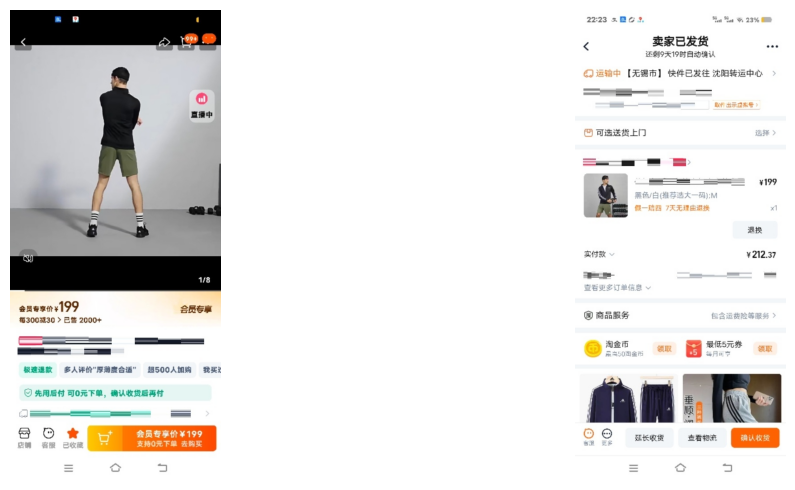

[{'role': 'system',
  'content': [{'type': 'text',
    'text': '你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。'}]},
 {'role': 'user', 'content': [{'type': 'image'}]},
 {'role': 'assistant',
  'content': [{'type': 'text', 'text': '小明尚未掌握图片识别技巧，麻烦您简要描述一下，以便更好地帮助您~'}]},
 {'role': 'user', 'content': [{'type': 'image'}]},
 {'role': 'assistant',
  'content': [{'type': 'text', 'text': '能否告知您的订单遇到了什么麻烦？请您简单描述一下情况。'}]},
 {'role': 'user', 'content': [{'type': 'text', 'text': '这件服装适合哪个季节穿着？'}]},
 {'role': 'assistant', 'content': [{'type': 'text', 'text': '此商品适合在【秋天】穿着。'}]},
 {'role': 'user', 'content': [{'type': 'text', 'text': '正是这一款'}]},
 {'role': 'assistant',
  'content': [{'type': 'text',
    'text': '当前系统还不能全面识别各种情况，麻烦您尝试用不同的方式重新说明您的问题。'}]},
 {'role': 'user', 'content': [{'type': 'text', 'text': '<http>'}]},
 {'role': 'assistant',
  'content': [{'type': 'text',
    'text': '店铺参与国庆节狂欢促销，使用优惠券购买更加实惠，快来抢购（区间价格表示不同颜色的折扣不同，具体折扣请查看结算页面）   ⏰促销时间：9月26日20:00至10月7日23:59  这款经典的运动外套，设计灵感源自往日风尚，采用标志性的光泽特里科面料结合立领设计

In [5]:
from utils.data_utils import CustomDataset,Conversions
import matplotlib.pyplot as plt

data_set=CustomDataset(data_path='../datas/train',data_type='train')
data_dict=data_set[12]
# print(data_dict)
images=data_dict['image']


# 确定行数和列数以创建网格布局，这里假设最多 4 列
num_images = len(images)
cols = min(num_images, 4)  # 最多4列
rows = (num_images + cols - 1) // cols  # 计算需要多少行

# 创建一个子图网格
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # 将 axes 展平为一维数组，方便迭代

# 显示每个图像
for ax, img in zip(axes, images):
    ax.imshow(img)
    ax.axis('off')  # 关闭坐标轴

# 如果图像数量不足填满整个网格，关闭多余的子图
for idx in range(num_images, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

conversations=Conversions()
conversations.parse_conversation(data_dict['instruction'])


In [ ]:
# Qwen/Qwen2-VL-2B-Instruct
from transformers import Qwen2VLModel, Qwen2VLTokenizer,Qwen2VLPreTrainedModel

In [5]:
from jinja2 import Template
# 定义模板字符串
template_str = """
<!DOCTYPE html>
<html>
<head>
    <title>Welcome Page</title>
</head>
<body>
    <h1>Hello, {{ name }}!</h1>
</body>
</html>
"""

# 创建模板对象
template = Template(template_str)

# 渲染模板，传入上下文数据
rendered_html = template.render(name='Alice')

print(rendered_html)

<!DOCTYPE html>
<html>
<head>
    <title>Welcome Page</title>
</head>
<body>
    <h1>Hello, Alice!</h1>
</body>
</html>

In [7]:

a={
    "chat_template": "{% set image_count = namespace(value=0) %}{% set video_count = namespace(value=0) %}\
        {% for message in messages %}\
            {% if loop.first and message['role'] != 'system' %}\
                <|im_start|>system\nYou are a helpful assistant.<|im_end|>\n\
            {% endif %}\
            <|im_start|>{{ message['role'] }}\n\
            {% if message['content'] is string %}\
                {{ message['content'] }}<|im_end|>\n\
            {% else %}\
                {% for content in message['content'] %}\
                    {% if content['type'] == 'image' or 'image' in content or 'image_url' in content %}\
                        {% set image_count.value = image_count.value + 1 %}\
                        {% if add_vision_id %}\
                            Picture {{ image_count.value }}: \
                        {% endif %}\
                        <|vision_start|><|image_pad|><|vision_end|>\
                        {% elif content['type'] == 'video' or 'video' in content %}\
                            {% set video_count.value = video_count.value + 1 %}\
                            {% if add_vision_id %}Video {{ video_count.value }}: \
                        {% endif %}\
                        <|vision_start|><|video_pad|><|vision_end|>\
                        {% elif 'text' in content %}\
                            {{ content['text'] }}\
                        {% endif %}\
                    {% endfor %}<|im_end|>\n\
            {% endif %}\
        {% endfor %}\
        {% if add_generation_prompt %}\
            <|im_start|>assistant\n\
        {% endif %}"
}
template = Template(a['chat_template']) 
print(template)







<Template memory:77118f53c4a0>

In [8]:
x="你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。\n<用户与客服的对话 START>\n用户: 于\n客服: 十里春风不及您，欢迎来到我们的店铺😊。我是您的小助手【客服精灵】，有什么事情是【客服精灵】能帮到您的吗？\n用户: <image>\n客服: 亲爱的，我在这里哦，只是一张图片还不能解答您的疑问呢，麻烦您用文字具体说明一下，比如“发货时间”、“店铺促销”等。\n用户: 颜色变淡了吗？\n客服: 这款皮带扣采用实心锌合金并经过真空电镀处理，颜色持久不褪，质量上乘。\n<用户与客服的对话 END>\n请直接只输出分类标签结果，不需要其他多余的话。以下是可以参考的分类标签为：[\"反馈密封性不好\",\"是否好用\",\"是否会生锈\",\"排水方式\",\"包装区别\",\"发货数量\",\"反馈用后症状\",\"商品材质\",\"功效功能\",\"是否易褪色\",\"适用季节\",\"能否调光\",\"版本款型区别\",\"单品推荐\",\"用法用量\",\"控制方式\",\"上市时间\",\"商品规格\",\"信号情况\",\"养护方法\",\"套装推荐\",\"何时上货\",\"气泡\"]\n"



print(x)

你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。
<用户与客服的对话 START>
用户: 于
客服: 十里春风不及您，欢迎来到我们的店铺😊。我是您的小助手【客服精灵】，有什么事情是【客服精灵】能帮到您的吗？
用户: <image>
客服: 
亲爱的，我在这里哦，只是一张图片还不能解答您的疑问呢，麻烦您用文字具体说明一下，比如“发货时间”、“店铺促销”等。
用户: 颜色变淡了吗？
客服: 这款皮带扣采用实心锌合金并经过真空电镀处理，颜色持久不褪，质量上乘。
<用户与客服的对话 END>
请直接只输出分类标签结果，不需要其他多余的话。以下是可以参考的分类标签为：["反馈密封性不好","是否好用","是否会生锈"
,"排水方式","包装区别","发货数量","反馈用后症状","商品材质","功效功能","是否易褪色","适用季节","能否调光","版本款型
区别","单品推荐","用法用量","控制方式","上市时间","商品规格","信号情况","养护方法","套装推荐","何时上货","气泡"]

In [ ]:
from PIL import Image
import requests
import torch
from torchvision import io
from typing import Dict
import os
os.environ['HF_HOME']='huggingface'
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from utils.data_utils import CustomDataset,Conversions
from torch.utils.data import DataLoader

def main():
    # Load the model in half-precision on the available device(s)
    model = Qwen2VLForConditionalGeneration.from_pretrained(
        "Qwen/Qwen2-VL-2B-Instruct", torch_dtype="auto", device_map="auto"
    )
    processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-2B-Instruct")
    
    data_set=CustomDataset(data_path='datas/train',data_type='train')
    i=0
    datas={'instruction':[],'image':[]}
    while i<=100:
        if len(data_set[i]['image'])==1:
            datas['instruction'].append(data_set[i]['instruction'])
            datas['image'].append(data_set[i]['image'][0])
            i+=1
            continue
    conversation_helper=Conversions()
    def resize_image(image):
        origin_w,origin_h = image.size
        new_w,new_h = origin_h//2,origin_w//2
        image=image.resize((new_w,new_h))
        return image
    datas['image']=[resize_image(Image.open(image)) for image in datas['image']]
    
    conversation=[conversation_helper.parse_conversation(instruction) for instruction in datas['instruction']]

    # Preprocess the inputs
    text_prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)
    # Excepted output: '<|im_start|>system\nYou are a helpful assistant.<|im_end|>\n<|im_start|>user\n<|vision_start|><|image_pad|><|vision_end|>Describe this image.<|im_end|>\n<|im_start|>assistant\n'

    inputs = processor(
        text=[text_prompt], images=[datas['image']], padding=True, return_tensors="pt"
    )
    for input in inputs:
        input = input.to("cuda")

    # Inference: Generation of the output
    output_ids = model.generate(**input, max_new_tokens=128)
    generated_ids = [
        output_ids[len(input_ids) :]
        for input_ids, output_ids in zip(inputs.input_ids, output_ids)
    ]
    output_text = processor.batch_decode(
        generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True
    )
    print(output_text)


if __name__=='__main__':
    main()

In [ ]:
from PIL import Image
import requests
import torch
from torchvision import io
from typing import Dict
import os
os.environ['HF_HOME']='huggingface'
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from utils.data_utils import CustomDataset,Conversions
from torch.utils.data import DataLoader

def main():
    # Load the model in half-precision on the available device(s)
    model = Qwen2VLForConditionalGeneration.from_pretrained(
        "Qwen/Qwen2-VL-2B-Instruct", torch_dtype="auto", device_map="auto"
    )
    processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-2B-Instruct")
    
    data_set=CustomDataset(data_path='datas/train',data_type='train')
    i=0
    j=0
    datas={'instruction':[],'image':[],'output':[]}
    print('starting the data process')
    while i<=100:
        if len(data_set[j]['image'])==1:
            datas['instruction'].append(data_set[i]['instruction'])
            datas['image'].append(data_set[i]['image'][0])
            datas['output'].append(data_set[i]['output'])
            i+=1
            j+=1
            # print(i)
        j+=1
        continue
    print('data process finished')
    conversation_helper=Conversions()
    def resize_image(image):
        origin_w,origin_h = image.size
        new_w,new_h = origin_h//2,origin_w//2
        image=image.resize((new_w,new_h))
        return image
    print('image process started')
    datas['image']=[resize_image(image) for image in datas['image']]
    print('image process finished')
    conversation=[conversation_helper.parse_conversation(instruction) for instruction in datas['instruction']]
    print(f"starting the chat template process")
    # Preprocess the inputs
    text_prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)
    # Excepted output: '<|im_start|>system\nYou are a helpful assistant.<|im_end|>\n<|im_start|>user\n<|vision_start|><|image_pad|><|vision_end|>Describe this image.<|im_end|>\n<|im_start|>assistant\n'
    print(f"chat template process finished")
    inputs = processor(
        text=text_prompt, images=[datas['image']], padding=True, return_tensors="pt"
    )
    print(f"inputs process finished")
    print(inputs)
    print(type(inputs))
    for input in inputs:
        input = input.to("cuda")
        # Inference: Generation of the output
        output_ids = model.generate(**input, max_new_tokens=128)
        generated_ids = [
            output_ids[len(input_ids) :]
            for input_ids, output_ids in zip(inputs.input_ids, output_ids)
        ]
        output_text = processor.batch_decode(
            generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True
        )
        print(output_text)


if __name__=='__main__':
    main()

In [2]:
x="Picture 1: <image>\n你是一个电商领域识图专家,可以理解消费者上传的软件截图或实物拍摄图。现在,请你对消费者上传的图片进行分类。你只需要回答图片分类结果,不需要其他多余的话。以下是可以参考的分类标签,分类标签:[\"实物拍摄(含售后)\",\"商品分类选项\",\"商品头图\",\"商品详情页截图\",\"下单过程中出现异常（显示购买失败浮窗）\",\"订单详情页面\",\"支付页面\",\"消费者与客服聊天页面\",\"评论区截图页面\",\"物流页面-物流列表页面\",\"物流页面-物流跟踪页面\",\"物流页面-物流异常页面\",\"退款页面\",\"退货页面\",\"换货页面\",\"购物车页面\",\"店铺页面\",\"活动页面\",\"优惠券领取页面\",\"账单/账户页面\",\"个人信息页面\",\"投诉举报页面\",\"平台介入页面\",\"外部APP截图\",\"其他类别图片\"]。"
print(not x.startswith("Picture"))



False


In [11]:

from rich import print


data_set=CustomDataset(data_path='../datas/train',data_type='train')
i=0
j=0
datas={'instruction':[],'image':[],'output':[]}
print('starting the data process')
while i<10:
    if len(data_set[j]['image'])==1 and not data_set[j]['instruction'].startswith("Picture"):
        datas['instruction'].append(data_set[j]['instruction'])
        print(data_set[j]['instruction'])
        print(data_set[j]['output'])
        datas['image'].append(data_set[j]['image'][0])
        datas['output'].append(data_set[j]['output'])
        i+=1
        # print(i)
    j+=1
    continue
print(datas)

starting the data process

你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。
<用户与客服的对话 START>
用户: <image>
客服: 您在使用这款商品时遇到了哪些困扰呢？请您提供商品的链接，并向我说明具体情况~ 
如果需要进一步的帮助，可以【回复“转人工”（服务时间8:00-23:59）】，我们的在线客服会竭诚为您服务。
用户: 使用空调时出现漏水情况
客服: 若您在使用产品时遇到难题，可回复“客服”（服务时间8:00-23:59），我们将为您转接到在线客服进行处理哦~
<用户与客服的对话 END>
请直接只输出分类标签结果，不需要其他多余的话。以下是可以参考的分类标签为：["反馈密封性不好","是否好用","是否会生锈"
,"排水方式","包装区别","发货数量","反馈用后症状","商品材质","功效功能","是否易褪色","适用季节","能否调光","版本款型
区别","单品推荐","用法用量","控制方式","上市时间","商品规格","信号情况","养护方法","套装推荐","何时上货","气泡"]

反馈密封性不好

你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。
<用户与客服的对话 START>
用户: <image>
客服: 麻烦您简要说明一下遇到的问题哦。
用户: 编号470与编号473有何不同？
客服: 
<用户与客服的对话 END>
请直接只输出分类标签结果，不需要其他多余的话。以下是可以参考的分类标签为：["反馈密封性不好","是否好用","是否会生锈"
,"排水方式","包装区别","发货数量","反馈用后症状","商品材质","功效功能","是否易褪色","适用季节","能否调光","版本款型
区别","单品推荐","用法用量","控制方式","上市时间","商品规格","信号情况","养护方法","套装推荐","何时上货","气泡"]

版本款型区别

你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。
<用户与客服的对话 START>
用户: <image>
客服: 
亲爱的，我在这里哦，只是一张图片还不能解答您的疑问呢，麻烦您用文字具体说明一下，比如“发货时间”、“店铺促销”等。
用户: 是买三赠一吗？
客服: 尊敬的顾客可以浏览一下我们的店铺主页，如果有活动会详细告知，我们会定期推出多种优惠活动哦~ 非常感谢您的支持~
用户: 价值399的套餐组合
客服: 尊敬的顾客可以浏览一下我们的店铺主页~如果有活动，我们会进行详细介绍~
用户: 一共收到了几瓶
客服: 
<用户与客服的对话 END>
请直接只输出分类标签结果，不需要其他多余的话。以下是可以参考的分类标签为：["反馈密封性不好","是否好用","是否会生锈"
,"排水方式","包装区别","发货数量","反馈用后症状","商品材质","功效功能","是否易褪色","适用季节","能否调光","版本款型
区别","单品推荐","用法用量","控制方式","上市时间","商品规格","信号情况","养护方法","套装推荐","何时上货","气泡"]

发货数量

你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。
<用户与客服的对话 START>
用户: <http>
客服: 亲爱的，您有什么疑问可以直接告诉我哦~ 比如说关于【物流时间】或者【店铺促销】等方面的问题。
用户: <image>
客服: 
亲爱的，我在这儿，不过只有一个图片信息，不太明白您的问题，能否用文字具体说明一下，比如“发货日期”、“店铺促销”等。
用户: 标记的这两款，是不是只是包装不一样，里面的花生内容相同？
客服: 
我们这里有三种类型的花生：带壳生花生、带壳熟花生和无壳花生米。生花生是直接晒干的，没有进一步加工，吃起来软糯且甜；
熟花生则是用小火慢慢炒制的，口感香脆；花生米也是直接晒干后去壳的，您可以根据个人喜好来挑选哦~
<用户与客服的对话 END>
请直接只输出分类标签结果，不需要其他多余的话。以下是可以参考的分类标签为：["反馈密封性不好","是否好用","是否会生锈"
,"排水方式","包装区别","发货数量","反馈用后症状","商品材质","功效功能","是否易褪色","适用季节","能否调光","版本款型
区别","单品推荐","用法用量","控制方式","上市时间","商品规格","信号情况","养护方法","套装推荐","何时上货","气泡"]

包装区别

你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。
<用户与客服的对话 START>
用户: <http>
客服: 
用户: <image>
客服: 亲爱的，您对图片里的这款商品有什么想要了解的吗~ 提醒一下，对于其他店铺的商品，我们无法通过图片来查找哦~ 
您可以尝试在店铺里用【识图】功能搜索一下呢~
用户: 这款鞋子适合秋冬季穿吗？
客服: 亲爱的，这款运动鞋适合全年穿着，无论哪个季节都合适~ 
推荐您依据季节的不同，灵活改变袜子的厚度，从而享受最舒适的穿戴感受。
<用户与客服的对话 END>
请直接只输出分类标签结果，不需要其他多余的话。以下是可以参考的分类标签为：["反馈密封性不好","是否好用","是否会生锈"
,"排水方式","包装区别","发货数量","反馈用后症状","商品材质","功效功能","是否易褪色","适用季节","能否调光","版本款型
区别","单品推荐","用法用量","控制方式","上市时间","商品规格","信号情况","养护方法","套装推荐","何时上货","气泡"]

适用季节

你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。
<用户与客服的对话 START>
用户: <image>
客服: 您好，这是您的商品列表截图，如果您有任何疑问，欢迎向我咨询。
用户: 这些款式的区别在哪里？
客服: 亲爱的，HUAWEI Pura 
70系列的每一款都非常出色，主要取决于哪一款更符合您的需求。如果您对外观设计和摄影有更高的要求，可以考虑HUAWEI Pura 
70 Ultra；如果您更看重充电续航能力，希望拥有更耐磨的屏幕和天通卫星通信功能，可以选择HUAWEI Pura 70 
Pro+；如果您偏爱曲面屏并且对拍照有较高要求，可以看看HUAWEI Pura 70 Pro；如果您更倾向于直面屏，那么HUAWEI Pura 
70将是不错的选择。无论您选择哪一款，我相信都会带来满意的使用体验。
用户: 哪款手机更好一些，mate60pro还是p70pro？
客服: 亲爱的，HUAWEI Mate 
60系列采用了中轴对称的设计风格，显得稳重而大气，若您偏爱经典设计且追求更宽广视野的手机，这款会是不错的选择。/:012 
另外，HUAWEI Pura 
70系列则以其创新的超级符号设计脱颖而出，不仅辨识度高，而且单手操作更为舒适，若您倾向于创新设计和更佳的单手握持体验
，不妨考虑HUAWEI Pura 70系列。/:066 这两个系列都是我们的旗舰产品，亲爱的，您可以根据个人喜好来挑选。
<用户与客服的对话 END>
请直接只输出分类标签结果，不需要其他多余的话。以下是可以参考的分类标签为：["反馈密封性不好","是否好用","是否会生锈"
,"排水方式","包装区别","发货数量","反馈用后症状","商品材质","功效功能","是否易褪色","适用季节","能否调光","版本款型
区别","单品推荐","用法用量","控制方式","上市时间","商品规格","信号情况","养护方法","套装推荐","何时上货","气泡"]

版本款型区别

你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。
<用户与客服的对话 START>
用户: 您好
客服: 亲爱的，我在这里，请问有什么能为您效劳的吗？😊
用户: 这是真品吗？
客服: 我们提供正品代购服务，请您放心购买，若不满意可退货并享有运费保险。
用户: <image>
客服: 我们提供正品代购服务，请您放心购买，若不满意可退货并享有运费保险。
用户: 这是哪款呢？
客服: 点击☛【发货时间详情】|点击☛【商品真伪查询】|点击☛【快递方式说明】|以上都不是？请咨询客服
用户: 秋季和夏季的款式哪个更适合
客服: 亲爱的，这款适合全年穿着，透气性非常好，四季皆宜哦。
<用户与客服的对话 END>
请直接只输出分类标签结果，不需要其他多余的话。以下是可以参考的分类标签为：["反馈密封性不好","是否好用","是否会生锈"
,"排水方式","包装区别","发货数量","反馈用后症状","商品材质","功效功能","是否易褪色","适用季节","能否调光","版本款型
区别","单品推荐","用法用量","控制方式","上市时间","商品规格","信号情况","养护方法","套装推荐","何时上货","气泡"]

适用季节

你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。
<用户与客服的对话 START>
用户: <image>
客服: 
用户: 这种类型的缺失可以补充吗？
客服: 亲爱的，这个还不太确定呢，如果喜欢的话建议先加个收藏，也可以看看其他款式有没有中意的哦~
<用户与客服的对话 END>
请直接只输出分类标签结果，不需要其他多余的话。以下是可以参考的分类标签为：["反馈密封性不好","是否好用","是否会生锈"
,"排水方式","包装区别","发货数量","反馈用后症状","商品材质","功效功能","是否易褪色","适用季节","能否调光","版本款型
区别","单品推荐","用法用量","控制方式","上市时间","商品规格","信号情况","养护方法","套装推荐","何时上货","气泡"]

何时上货

你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。
<用户与客服的对话 START>
用户: <image>
客服: 亲爱的，有什么能为您效劳的吗？请尽管吩咐。
用户: 你们店铺里哪一款合适呢？
客服: 很抱歉，我们店铺暂时没有这款商品，您可以看看我们店里的相似款式。
<用户与客服的对话 END>
请直接只输出分类标签结果，不需要其他多余的话。以下是可以参考的分类标签为：["反馈密封性不好","是否好用","是否会生锈"
,"排水方式","包装区别","发货数量","反馈用后症状","商品材质","功效功能","是否易褪色","适用季节","能否调光","版本款型
区别","单品推荐","用法用量","控制方式","上市时间","商品规格","信号情况","养护方法","套装推荐","何时上货","气泡"]

单品推荐

你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。
<用户与客服的对话 START>
用户: <http>
客服: 
用户: 冬天适合穿吗
客服: 
用户: <image>
客服: 亲爱的，您挑选的这款商品特别适合在【炎热的季节】穿着哦~ 除了加厚款的，大多数款式一年四季都适宜穿着~ --- 
如果您喜欢，可以考虑下单尝试，我们店铺的商品通常都包含【免费运费保险】，如果试穿后觉得不合适，也提供【七天无理由退
换服务】哟~
用户: 标签上不是标明适合秋季和冬季穿的吗？
客服: 亲爱的，您挑选的这款商品特别适合在【夏天】穿着呢~ 
不同地区的气温有所差异，您可以根据当地的气温和天气情况来决定如何搭配哦~
<用户与客服的对话 END>
请直接只输出分类标签结果，不需要其他多余的话。以下是可以参考的分类标签为：["反馈密封性不好","是否好用","是否会生锈"
,"排水方式","包装区别","发货数量","反馈用后症状","商品材质","功效功能","是否易褪色","适用季节","能否调光","版本款型
区别","单品推荐","用法用量","控制方式","上市时间","商品规格","信号情况","养护方法","套装推荐","何时上货","气泡"]

适用季节

{
    'instruction': [
        '你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。\n<用户与客服的对话 START>\n用户: 
<image>\n客服: 您在使用这款商品时遇到了哪些困扰呢？请您提供商品的链接，并向我说明具体情况~ 
如果需要进一步的帮助，可以【回复“转人工”（服务时间8:00-23:59）】，我们的在线客服会竭诚为您服务。\n用户: 
使用空调时出现漏水情况\n客服: 
若您在使用产品时遇到难题，可回复“客服”（服务时间8:00-23:59），我们将为您转接到在线客服进行处理哦~\n<用户与客服的对
话 
END>\n请直接只输出分类标签结果，不需要其他多余的话。以下是可以参考的分类标签为：["反馈密封性不好","是否好用","是否
会生锈","排水方式","包装区别","发货数量","反馈用后症状","商品材质","功效功能","是否易褪色","适用季节","能否调光","
版本款型区别","单品推荐","用法用量","控制方式","上市时间","商品规格","信号情况","养护方法","套装推荐","何时上货","
气泡"]\n',
        '你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。\n<用户与客服的对话 START>\n用户: 
<image>\n客服: 麻烦您简要说明一下遇到的问题哦。\n用户: 编号470与编号473有何不同？\n客服: \n<用户与客服的对话 
END>\n请直接只输出分类标签结果，不需要其他多余的话。以下是可以参考的分类标签为：["反馈密封性不好","是否好用","是否
会生锈","排水方式","包装区别","发货数量","反馈用后症状","商品材质","功效功能","是否易褪色","适用季节","能否调光","
版本款型区别","单品推荐","用法用量","控制方式","上市时间","商品规格","信号情况","养护方法","套装推荐","何时上货","
气泡"]\n',
        '你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。\n<用户与客服的对话 START>\n用户: 
<image>\n客服: 
亲爱的，我在这里哦，只是一张图片还不能解答您的疑问呢，麻烦您用文字具体说明一下，比如“发货时间”、“店铺促销”等。\n用
户: 是买三赠一吗？\n客服: 尊敬的顾客可以浏览一下我们的店铺主页，如果有活动会详细告知，我们会定期推出多种优惠活动哦~
非常感谢您的支持~\n用户: 价值399的套餐组合\n客服: 
尊敬的顾客可以浏览一下我们的店铺主页~如果有活动，我们会进行详细介绍~\n用户: 一共收到了几瓶\n客服: 
\n<用户与客服的对话 
END>\n请直接只输出分类标签结果，不需要其他多余的话。以下是可以参考的分类标签为：["反馈密封性不好","是否好用","是否
会生锈","排水方式","包装区别","发货数量","反馈用后症状","商品材质","功效功能","是否易褪色","适用季节","能否调光","
版本款型区别","单品推荐","用法用量","控制方式","上市时间","商品规格","信号情况","养护方法","套装推荐","何时上货","
气泡"]\n',
        '你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。\n<用户与客服的对话 START>\n用户: 
<http>\n客服: 亲爱的，您有什么疑问可以直接告诉我哦~ 比如说关于【物流时间】或者【店铺促销】等方面的问题。\n用户: 
<image>\n客服: 
亲爱的，我在这儿，不过只有一个图片信息，不太明白您的问题，能否用文字具体说明一下，比如“发货日期”、“店铺促销”等。\n
用户: 标记的这两款，是不是只是包装不一样，里面的花生内容相同？\n客服: 
我们这里有三种类型的花生：带壳生花生、带壳熟花生和无壳花生米。生花生是直接晒干的，没有进一步加工，吃起来软糯且甜；
熟花生则是用小火慢慢炒制的，口感香脆；花生米也是直接晒干后去壳的，您可以根据个人喜好来挑选哦~\n<用户与客服的对话 
END>\n请直接只输出分类标签结果，不需要其他多余的话。以下是可以参考的分类标签为：["反馈密封性不好","是否好用","是否
会生锈","排水方式","包装区别","发货数量","反馈用后症状","商品材质","功效功能","是否易褪色","适用季节","能否调光","
版本款型区别","单品推荐","用法用量","控制方式","上市时间","商品规格","信号情况","养护方法","套装推荐","何时上货","
气泡"]\n',
        '你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。\n<用户与客服的对话 START>\n用户: 
<http>\n客服: \n用户: <image>\n客服: 亲爱的，您对图片里的这款商品有什么想要了解的吗~ 
提醒一下，对于其他店铺的商品，我们无法通过图片来查找哦~ 您可以尝试在店铺里用【识图】功能搜索一下呢~\n用户: 
这款鞋子适合秋冬季穿吗？\n客服: 亲爱的，这款运动鞋适合全年穿着，无论哪个季节都合适~ 
推荐您依据季节的不同，灵活改变袜子的厚度，从而享受最舒适的穿戴感受。\n<用户与客服的对话 
END>\n请直接只输出分类标签结果，不需要其他多余的话。以下是可以参考的分类标签为：["反馈密封性不好","是否好用","是否
会生锈","排水方式","包装区别","发货数量","反馈用后症状","商品材质","功效功能","是否易褪色","适用季节","能否调光","
版本款型区别","单品推荐","用法用量","控制方式","上市时间","商品规格","信号情况","养护方法","套装推荐","何时上货","
气泡"]\n',
        '你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。\n<用户与客服的对话 START>\n用户: 
<image>\n客服: 您好，这是您的商品列表截图，如果您有任何疑问，欢迎向我咨询。\n用户: 这些款式的区别在哪里？\n客服: 
亲爱的，HUAWEI Pura 
70系列的每一款都非常出色，主要取决于哪一款更符合您的需求。如果您对外观设计和摄影有更高的要求，可以考虑HUAWEI Pura 
70 Ultra；如果您更看重充电续航能力，希望拥有更耐磨的屏幕和天通卫星通信功能，可以选择HUAWEI Pura 70 
Pro+；如果您偏爱曲面屏并且对拍照有较高要求，可以看看HUAWEI Pura 70 Pro；如果您更倾向于直面屏，那么HUAWEI Pura 
70将是不错的选择。无论您选择哪一款，我相信都会带来满意的使用体验。\n用户: 
哪款手机更好一些，mate60pro还是p70pro？\n客服: 亲爱的，HUAWEI Mate 
60系列采用了中轴对称的设计风格，显得稳重而大气，若您偏爱经典设计且追求更宽广视野的手机，这款会是不错的选择。/:012 
另外，HUAWEI Pura 
70系列则以其创新的超级符号设计脱颖而出，不仅辨识度高，而且单手操作更为舒适，若您倾向于创新设计和更佳的单手握持体验
，不妨考虑HUAWEI Pura 70系列。/:066 
这两个系列都是我们的旗舰产品，亲爱的，您可以根据个人喜好来挑选。\n<用户与客服的对话 
END>\n请直接只输出分类标签结果，不需要其他多余的话。以下是可以参考的分类标签为：["反馈密封性不好","是否好用","是否
会生锈","排水方式","包装区别","发货数量","反馈用后症状","商品材质","功效功能","是否易褪色","适用季节","能否调光","
版本款型区别","单品推荐","用法用量","控制方式","上市时间","商品规格","信号情况","养护方法","套装推荐","何时上货","
气泡"]\n',
        '你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。\n<用户与客服的对话 START>\n用户: 
您好\n客服: 亲爱的，我在这里，请问有什么能为您效劳的吗？😊\n用户: 这是真品吗？\n客服: 
我们提供正品代购服务，请您放心购买，若不满意可退货并享有运费保险。\n用户: <image>\n客服: 
我们提供正品代购服务，请您放心购买，若不满意可退货并享有运费保险。\n用户: 这是哪款呢？\n客服: 
点击☛【发货时间详情】|点击☛【商品真伪查询】|点击☛【快递方式说明】|以上都不是？请咨询客服\n用户: 
秋季和夏季的款式哪个更适合\n客服: 亲爱的，这款适合全年穿着，透气性非常好，四季皆宜哦。\n<用户与客服的对话 
END>\n请直接只输出分类标签结果，不需要其他多余的话。以下是可以参考的分类标签为：["反馈密封性不好","是否好用","是否
会生锈","排水方式","包装区别","发货数量","反馈用后症状","商品材质","功效功能","是否易褪色","适用季节","能否调光","
版本款型区别","单品推荐","用法用量","控制方式","上市时间","商品规格","信号情况","养护方法","套装推荐","何时上货","
气泡"]\n',
        '你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。\n<用户与客服的对话 START>\n用户: 
<image>\n客服

In [4]:
import json
import re
from rich import print

# 错误的 JSON 格式字符串（单引号）
json_string_incorrect = "['适用季节']"

# 使用正则表达式替换单引号为双引号
json_string_corrected = re.sub(r"'", '"', json_string_incorrect)

try:
    result_list = json.loads(json_string_corrected)
    print(result_list)  # 输出: ['适用季节']
except json.JSONDecodeError as e:
    print(f"JSON 解码错误: {e}")

['适用季节']

In [5]:
import json
import re

def convert_to_json(input_string):
    if not input_string:
        return None, "输入字符串为空"
    
    # 去除前后空白字符
    stripped_string = input_string.strip()
    
    # 替换单引号为双引号
    corrected_string = stripped_string.replace("'", '"')
    
    # 替换常见特殊引号为标准双引号
    corrected_string = corrected_string.replace('‘', '"').replace('’', '"').replace('“', '"').replace('”', '"')
    
    # 处理转义字符
    corrected_string = corrected_string.encode('utf-8').decode('unicode_escape')
    
    # 确保整个字符串用方括号包围
    if not corrected_string.startswith('[') or not corrected_string.endswith(']'):
        corrected_string = f"[{corrected_string}]"
    
    # 移除多余的逗号或括号
    corrected_string = re.sub(r'\]\s*,\s*\[', ',', corrected_string)
    corrected_string = re.sub(r'(?<!\[)\s*,\s*(?!\])', ', ', corrected_string)
    
    # 确保每个元素都被双引号包围
    corrected_string = re.sub(r'(?<=\[|\,)\s*([^"\[\],]+)\s*(?=\,|\])', r'"\1"', corrected_string)
    
    try:
        result_list = json.loads(corrected_string)
        return result_list, None
    except json.JSONDecodeError as e:
        return None, f"JSON 解码错误: {e}"

# 示例字符串
json_strings = [
    '["商品材质", "适用季节", "是否易褪色"]',
    "['商品材质', '适用季节', '是否易褪色']",
    '   ["商品材质", "适用季节", "是否易褪色"]   ',
    '',
    '‘["商品材质", "适用季节", "是否易褪色"]’',
    '["商品材质", "适用季节", "是否易褪色"',
    '[商品材质, 适用季节, 是否易褪色]',
    '["商品材质", "适用季节", "是否易褪色\\"]',
    '["商品材质", "适用季节", 是否易褪色]',
    '["商品材质", "适用季节", "是否易褪色], ["另一个属性"]',
    '[商品材质]'
]

for i, json_string in enumerate(json_strings):
    result_list, error_message = convert_to_json(json_string)
    if error_message:
        print(f"第 {i+1} 个字符串解析失败: {error_message}")
    else:
        print(f"第 {i+1} 个字符串解析成功: {result_list}")

第 1 个字符串解析成功: ['å\x95\x86å\x93\x81æ\x9d\x90è´¨', 'é\x80\x82ç\x94¨å\xad£è\x8a\x82', 
'æ\x98¯å\x90¦æ\x98\x93è¤ªè\x89²']

第 2 个字符串解析成功: ['å\x95\x86å\x93\x81æ\x9d\x90è´¨', 'é\x80\x82ç\x94¨å\xad£è\x8a\x82', 
'æ\x98¯å\x90¦æ\x98\x93è¤ªè\x89²']

第 3 个字符串解析成功: ['å\x95\x86å\x93\x81æ\x9d\x90è´¨', 'é\x80\x82ç\x94¨å\xad£è\x8a\x82', 
'æ\x98¯å\x90¦æ\x98\x93è¤ªè\x89²']

第 4 个字符串解析失败: 输入字符串为空

第 5 个字符串解析失败: JSON 解码错误: Expecting ',' delimiter: line 1 column 5 (char 4)

第 6 个字符串解析失败: JSON 解码错误: Expecting ',' delimiter: line 1 column 53 (char 52)

第 7 个字符串解析成功: ['å\x95\x86å\x93\x81æ\x9d\x90è´¨', 'é\x80\x82ç\x94¨å\xad£è\x8a\x82', 
'æ\x98¯å\x90¦æ\x98\x93è¤ªè\x89²']

第 8 个字符串解析成功: ['å\x95\x86å\x93\x81æ\x9d\x90è´¨', 'é\x80\x82ç\x94¨å\xad£è\x8a\x82', 
'æ\x98¯å\x90¦æ\x98\x93è¤ªè\x89²']

第 9 个字符串解析成功: ['å\x95\x86å\x93\x81æ\x9d\x90è´¨', 'é\x80\x82ç\x94¨å\xad£è\x8a\x82', 
'æ\x98¯å\x90¦æ\x98\x93è¤ªè\x89²']

第 10 个字符串解析失败: JSON 解码错误: Expecting ',' delimiter: line 1 column 53 (char 52)

第 11 个字符串解析成功: ['å\x95\x86å\x93\x81æ\x9d\x90è´¨']

In [5]:
x=7//2
print(x)

3


In [3]:
import torch
import torch.distributed as dist
from torch.cuda import nccl
import packaging

def get_mixed_precision_policy(train_args, rank):
    verify_bfloat_support = (
        torch.version.cuda
        and torch.cuda.is_bf16_supported()
        and packaging.version.parse(torch.version.cuda).release >= (11, 0)
        and dist.is_nccl_available()
        and nccl.version() >= (2, 10)
    )
    return verify_bfloat_support
print(get_mixed_precision_policy(None, 0))
print(torch.cuda.is_bf16_supported())
print(packaging.version.parse(torch.version.cuda).release)
print(dist.is_nccl_available())
print(nccl.version())   

True
True
(12, 4)
True
(2, 21, 5)


# 评估测试


In [5]:
from sklearn.metrics import f1_score

# 只能是int















ValueError: Found input variables with inconsistent numbers of samples: [2, 3]